## Final Project 
### Predict future sales


In [1]:
#Instructions
#Build one prediction model using the ML algorithms
#Evaluate your prediction model
#Try different ways to improve your model and show the improvements.

In [2]:
#These python libraries will be used to read in the data, do some basic exploratory analysis and manipulate the dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read in Data and assign names to files 
#we determined the pandas read_csv was the best choice for this
items = pd.read_csv('competitive-data-science-predict-future-sales/items.csv')
shops = pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')
sales_train = pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv')
item_categories = pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')


test = pd.read_csv('competitive-data-science-predict-future-sales/test.csv')


#we format our train and test data to only have the relevant columns for our model 
trainset_names = ['items', 'shops', 'sales_train', 'item_categories']
trainset = [items, shops, sales_train, item_categories]


In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
test.head()
#this is the file we will be using to predict the sales for 

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# Analyze the Data

In [9]:
#Check the properties and description of the files
for name,data in zip(trainset_names, trainset):
  print(name,':')
  print(data.info())
  print()
  print('*'*50)

items :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None

**************************************************
shops :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

**************************************************
sales_train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------      

In [10]:
#let's start by looking at the distinct items sold in each of our data files
unique_itemid = set(items['item_id'].unique())
unique_salestrain_itemid = set(sales_train['item_id'].unique())
unique_test_itemid = set(test['item_id'].unique())

print('Disinct items in items: ', len(unique_itemid))
print('Disinct items in sales_train: ', len(unique_salestrain_itemid))
print('Disinct items in test: ', len(unique_test_itemid))

#now we look at the differences between our datasets to see if any contain more items than the others 
print('itemid present in sales_train but not in items:', len(unique_salestrain_itemid.difference(unique_itemid)))
print('itemid present in test but not in sales_train:', len(unique_itemid.difference(unique_salestrain_itemid)))
print('itemid present in test but not in items:', len(unique_test_itemid.difference(unique_itemid)))

Disinct items in items:  22170
Disinct items in sales_train:  21807
Disinct items in test:  5100
itemid present in sales_train but not in items: 0
itemid present in test but not in sales_train: 363
itemid present in test but not in items: 0


In [11]:
#continuation of what we did above 
unique_shops_shopid = set(shops['shop_id'].unique())
unique_salestrain_shopid = set(sales_train['shop_id'].unique())
unique_test_shopid = set(test['shop_id'].unique())

print('shopid present in sales_train but not in shops:', len(unique_salestrain_shopid.difference(unique_shops_shopid)))
print('shopid present in test but not in sales_train:', len(unique_test_shopid.difference(unique_salestrain_shopid)))
print('shopid present in test but not in shops:', len(unique_test_shopid.difference(unique_shops_shopid)))

shopid present in sales_train but not in shops: 0
shopid present in test but not in sales_train: 0
shopid present in test but not in shops: 0


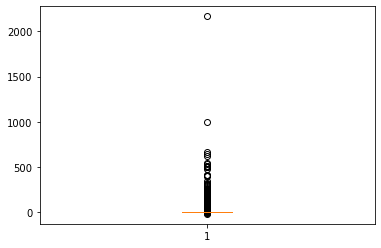

In [12]:
plt.boxplot(sales_train.item_cnt_day)
plt.show()

In [13]:
sales_train[sales_train.item_cnt_day >= 500]
#looking for any exceptional salesdays for shops that may be potential outliers 


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1573253,22.04.2014,15,27,8057,1200.000000,502.0
1708207,28.06.2014,17,25,20949,5.000000,501.0
2048518,02.10.2014,21,12,9242,1500.000000,512.0
2067669,09.10.2014,21,55,19437,899.000000,508.0
2257299,19.12.2014,23,12,20949,4.000000,500.0
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2608040,14.04.2015,27,12,3731,1904.548077,624.0
2626181,19.05.2015,28,12,11373,155.192950,539.0
2851073,29.09.2015,32,55,9249,1500.000000,533.0
2851091,30.09.2015,32,55,9249,1702.825746,637.0


In [14]:
sales_train = sales_train[sales_train.item_cnt_day < 700]# can change it to lower value
#remove outliers

In [15]:
sales_train[sales_train.item_cnt_day < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [16]:
sales_train = sales_train[sales_train.item_cnt_day > 0]
#remove outliers

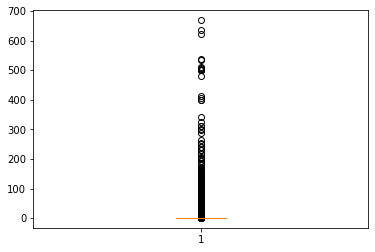

In [17]:
plt.boxplot(sales_train.item_cnt_day)
plt.show()

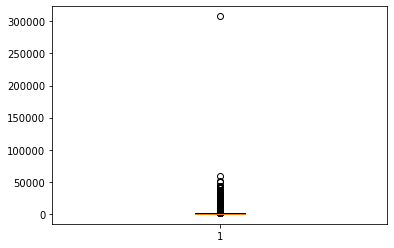

In [18]:
plt.boxplot(sales_train.item_price)
plt.show()

In [19]:
sales_train[sales_train.item_price > 50000 ]



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
885138,17.09.2013,8,12,11365,59200.0,1.0
1163158,13.12.2013,11,12,6066,307980.0,1.0
1488135,20.03.2014,14,25,13199,50999.0,1.0


In [20]:
sales_train = sales_train[sales_train.item_price < 10000]

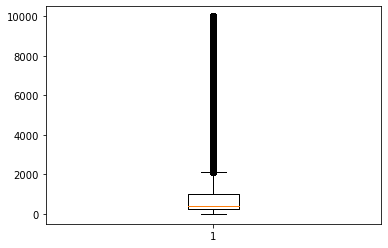

In [21]:
plt.boxplot(sales_train.item_price)
plt.show()

In [22]:
sales_train[sales_train.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [23]:
sales_train = sales_train[sales_train.item_price > 0]
#remove outliers

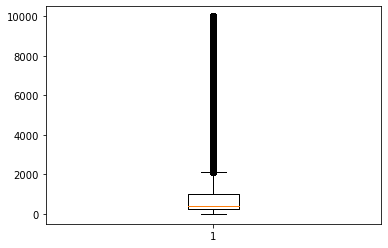

In [24]:
sales_train = sales_train[sales_train.item_price < 10000]
plt.boxplot(sales_train.item_price)
plt.show()

In [25]:
#lets look at the probability and cumulative distribution function for the prices of items 
price = np.array(sales_train['item_price'])
price = sorted(price)

pdf = price/np.sum(price)
cdf = np.cumsum(pdf)
cdf

array([3.10200520e-11, 6.20401041e-11, 1.00815169e-10, ...,
       9.99991138e-01, 9.99995569e-01, 1.00000000e+00])

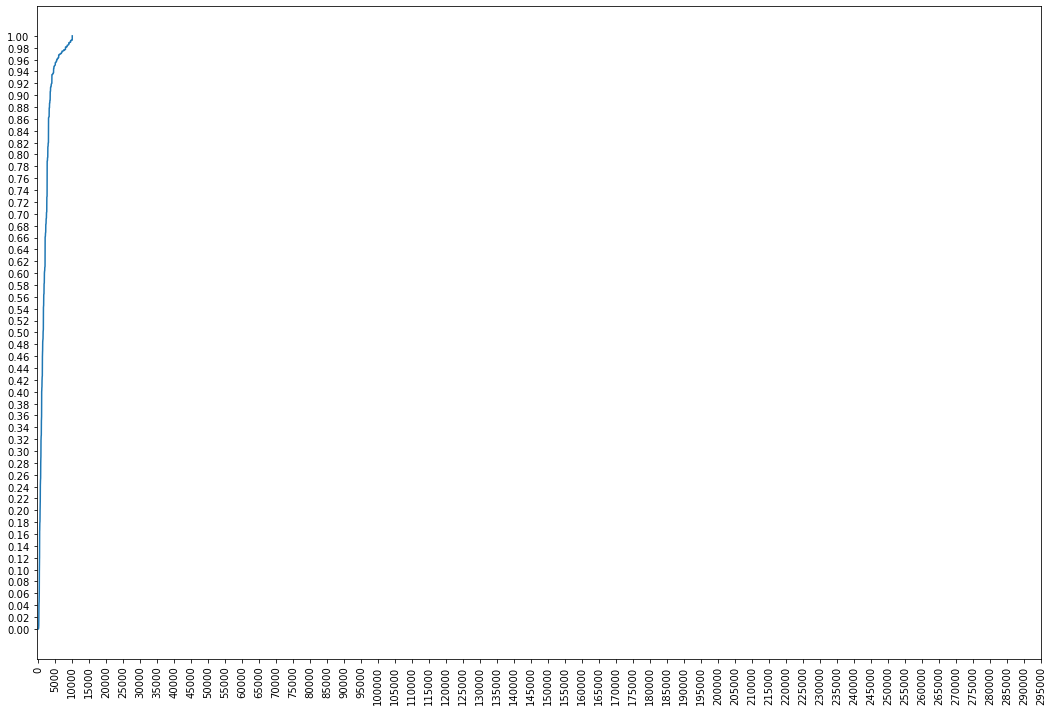

In [26]:
plt.figure(figsize = (18,12))
plt.plot(price,cdf)
plt.yticks(np.arange(0,1.0001,0.02))
plt.xticks(np.arange(0,300000,5000), rotation = 90)
plt.show()

In [27]:
#lets look at the dimensions of our data to prepare for merging the data 
display(sales_train.head(2))
print(sales_train.shape)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


(2908852, 6)


In [28]:
display(items.head(2))
print(items.shape)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


(22170, 3)


In [29]:
train_data = sales_train.merge(items[['item_category_id','item_id']],
                              on = 'item_id',
                              how='right')
train_data
#join the datasets to add the item_category_id to the dataset

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,01.09.2014,20.0,54.0,0,58.0,1.0,40
1,04.04.2014,15.0,55.0,1,4490.0,1.0,76
2,02.04.2014,15.0,55.0,1,4490.0,1.0,76
3,06.07.2014,18.0,55.0,1,4490.0,1.0,76
4,04.08.2014,19.0,55.0,1,4490.0,1.0,76
...,...,...,...,...,...,...,...
2909317,02.02.2013,1.0,42.0,22168,799.0,1.0,62
2909318,17.02.2013,1.0,16.0,22168,799.0,1.0,62
2909319,08.03.2013,2.0,43.0,22168,798.5,1.0,62
2909320,13.09.2013,8.0,12.0,22168,799.0,1.0,62


In [30]:
#before we remove the null values, let's add a new feature
#our new feature months, will improve our results 
#which its percentage 12%
train_data['months'] = (train_data['date_block_num'])%12
train_data.months.value_counts()

0.0     300197
2.0     281773
11.0    269775
1.0     267854
7.0     246456
5.0     235726
6.0     233183
3.0     226589
9.0     224977
4.0     223304
8.0     217784
10.0    181234
Name: months, dtype: int64

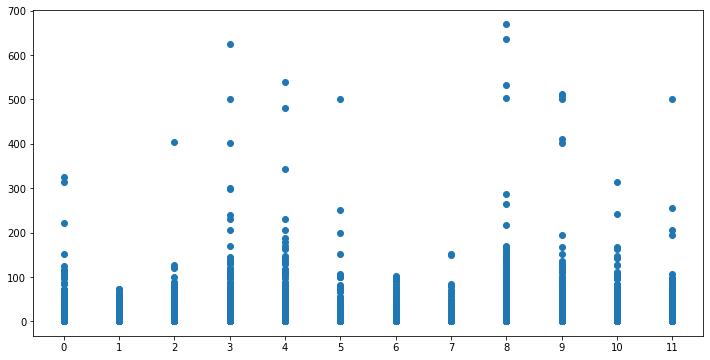

In [31]:
plt.figure(figsize = (12,6))
plt.scatter(train_data.dropna()['months'],
         train_data.dropna()['item_cnt_day'])
plt.xticks(np.arange(0,12,1))
plt.show()

In [32]:
train_data.isnull().sum()

date                470
date_block_num      470
shop_id             470
item_id               0
item_price          470
item_cnt_day        470
item_category_id      0
months              470
dtype: int64

In [33]:
train = train_data[['months', 'item_id', 'shop_id', 'item_cnt_day']]
train
#join the new months feature to the dataset 

,months,item_id,shop_id,item_cnt_day
0,8.0,0,54.0,1.0
1,3.0,1,55.0,1.0
2,3.0,1,55.0,1.0
3,6.0,1,55.0,1.0
4,7.0,1,55.0,1.0
...,...,...,...,...
2909317,1.0,22168,42.0,1.0
2909318,1.0,22168,16.0,1.0
2909319,2.0,22168,43.0,1.0
2909320,8.0,22168,12.0,1.0


In [34]:
#This is where we will do the bulk of our data cleaning and remove any NaN or null values from our data  
train = train.groupby(['months', 'item_id', 'shop_id'], as_index= False).agg('sum')
train

,months,item_id,shop_id,item_cnt_day
0,0.0,10,54.0,1.0
1,0.0,19,25.0,1.0
2,0.0,27,1.0,1.0
3,0.0,27,2.0,1.0
4,0.0,27,10.0,1.0
...,...,...,...,...
1388016,11.0,22167,44.0,2.0
1388017,11.0,22167,45.0,1.0
1388018,11.0,22167,54.0,9.0
1388019,11.0,22167,56.0,1.0


In [35]:
# check the missing data
train.isnull().sum()

months          0
item_id         0
shop_id         0
item_cnt_day    0
dtype: int64

In [52]:
train = train[train['item_cnt_day'] < 20]
train = train[train['item_cnt_day'] > 0]

train['item_cnt_day'] = np.log(train.item_cnt_day)
#get rid of outlying train data 

In [53]:
test['months'] = 34%12
test
#our data spans 34 months, so we do total months mod 12 to group our sales data into months 

,ID,shop_id,item_id,months,item_cnt_month
0,0,5,5037,10,1.690942
1,1,5,5320,10,1.690942
2,2,5,5233,10,1.690942
3,3,5,5232,10,1.690942
4,4,5,5268,10,1.690942
...,...,...,...,...,...
214195,214195,45,18454,10,1.347966
214196,214196,45,16188,10,1.347966
214197,214197,45,15757,10,1.347966
214198,214198,45,19648,10,1.347966


In [54]:
#find the correlation value for our features
train.corr()

,months,item_id,shop_id,item_cnt_day
months,1.000000,0.004056,0.019987,0.010892
item_id,0.004056,1.000000,0.032734,-0.098461
shop_id,0.019987,0.032734,1.000000,0.005154
item_cnt_day,0.010892,-0.098461,0.005154,1.000000


In [55]:
#We now import the relevant Sci-Kit Learn libraries to build of prediction models 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Drop the unneccesary columns from our train and test set
#split the data into the neccesary train test split to build and evaluate our models 

X = train.drop('item_cnt_day', axis =1)
Y = train['item_cnt_day']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(371964, 3)
(371964,)
(159414, 3)
(159414,)


In [56]:
#The first model we will be trying is the Linear Regression model 
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [57]:
pred = model.predict(X_train)
mse = mean_squared_error(Y_train,pred)
mse

0.18912723284948957

In [58]:
rmse = mse**.5
rmse
#After we build our model, we evaluate it and measure the root-mean-square error to find out how effective our model was
#the best RMSE is a value of 0, so the smaller the better 
#the linear regression model is ok, but not that great 

0.43488760944580795

In [59]:
#The second model we tried is the Decision Tree Regressor model 
dmodel = DecisionTreeRegressor(max_depth = 4,)
dmodel.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4)

In [60]:
pred = dmodel.predict(X_train)
mse = mean_squared_error(Y_train,pred)
mse

0.1853569974191868

In [61]:
pred = dmodel.predict(X_test)
 
mse = mean_squared_error(Y_test,pred)
mse

0.1855593010737441

In [62]:
rmse = mse**.5
rmse
#following the same steps, we try building the Decision Tree Regressor Model 
#this has a comparable RMSE to linear regression, and is slightly better at predicting the data 

0.43076594697555204

In [63]:
#!pip install lightgbm

In [64]:
#Lets try a light gradient boosting model for our last model 
#and see if we can improve it by modifying the parameters of the function 

#docs referenced: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

from lightgbm import LGBMRegressor

LGBmodel = LGBMRegressor( n_estimators=31,
                           learning_rate=0.1,
                           num_leaves=31,
                           colsample_bytree=0.1,
                           subsample=1,
                           max_depth=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           min_split_gain=0,
                           min_child_weight=1)

# for the first modelling attempt, let's use mostly default parameters with small changes
LGBmodel.fit(X_train, Y_train)
LGBpred = LGBmodel.predict(X_test)

mse = mean_squared_error(Y_test, LGBpred)
rmse = mse**.5
print('The root mean squared error for our first model iteration is: ', rmse)


#for our new and improved modelling attempt, let's try and customize the values much more
#some of the important parameters here are n_estimators which is how many boosted trees we will fit to
#num_leaves which is the tree leaves for our learning model
#reg_alpha and reg_lamba which are respectively the L1 and L2 regularization weights

BetterLGBmodel = LGBMRegressor( n_estimators=300,
                           learning_rate=0.03,
                           num_leaves=50,
                           colsample_bytree=0.95,
                           subsample=0.872,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.0732,
                           min_split_gain=0.022,
                           min_child_weight=40)

BetterLGBmodel.fit(X_train, Y_train)
BetterLGBpred = BetterLGBmodel.predict(X_test)

mse = mean_squared_error(Y_test, BetterLGBpred)
rmse = mse**.5
print('The root mean squared error for our second model iteration is: ', rmse)

#Now we have successfully improved our prediction model, albeit by a small amount 
#But with these modifications to the model parameters, we have achieved the best RMSE out of all of our models

The root mean squared error for our first model iteration is:  0.43375938565149585
The root mean squared error for our second model iteration is:  0.41337216992848047


In [49]:
#actually creating the submission file for the kaggle project 

forecasting = dmodel.predict(test.drop('ID', axis=1))
forecasting = np.exp(forecasting)
test['item_cnt_month'] = forecasting
test

C:\Users\shash\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,ID,shop_id,item_id,months,item_cnt_month
0,0,5,5037,10,1.690942
1,1,5,5320,10,1.690942
2,2,5,5233,10,1.690942
3,3,5,5232,10,1.690942
4,4,5,5268,10,1.690942
...,...,...,...,...,...
214195,214195,45,18454,10,1.347966
214196,214196,45,16188,10,1.347966
214197,214197,45,15757,10,1.347966
214198,214198,45,19648,10,1.347966


In [50]:
finalSubmission = test[['ID', 'item_cnt_month']]
finalSubmission
finalSubmission.to_csv('finalSubmission.csv', index = False)

In [51]:
#this file is what we would submit to kaggle 